In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../../meta.csv', encoding='utf-8')
df.columns = [c.replace(' ', '_') for c in df.columns]
print(df.columns.to_list())

['Company', 'Star_Rating', 'Current_Employee', 'Work_Duration', 'Review_Title', 'Date_Posted', 'Job_Title', 'Job_Location', 'Recommend', 'CEO_Approval', 'Business_Outlook', 'Pros', 'Cons', 'Advice_to_Management']


In [3]:

df['Date_Posted'] = pd.to_datetime(df['Date_Posted'], dayfirst=True)


In [4]:
df = df[~(df['Date_Posted'] < '2016-01-01')]


In [6]:
quarters = pd.Series(pd.date_range('2016-01-01', '2022-12-31', freq='QS'))


In [7]:
aggregates = dict()
counts = dict()
count = 0
for q in quarters:
	aggregates[f'Q{count+1}'] = 0
	counts[f'Q{count+1}'] = 0
	count += 1

In [8]:
for idx, row in df.iterrows():
	for i in range(len(quarters)):
		if i < len(quarters) - 1:
			if row['Date_Posted'] >= quarters[i] and row['Date_Posted'] < quarters[i+1]:
				aggregates[f'Q{i+1}'] += row['Star_Rating']
				counts[f'Q{i+1}'] += 1

In [9]:
print(aggregates)
print(counts)

{'Q1': 366.0, 'Q2': 260.0, 'Q3': 346.0, 'Q4': 393.0, 'Q5': 635.0, 'Q6': 308.0, 'Q7': 451.0, 'Q8': 437.0, 'Q9': 407.0, 'Q10': 467.0, 'Q11': 474.0, 'Q12': 367.0, 'Q13': 401.0, 'Q14': 458.0, 'Q15': 498.0, 'Q16': 393.0, 'Q17': 514.0, 'Q18': 902.0, 'Q19': 1137.0, 'Q20': 1249.0, 'Q21': 2678.0, 'Q22': 2005.0, 'Q23': 1504.0, 'Q24': 1291.0, 'Q25': 1126.0, 'Q26': 0, 'Q27': 0, 'Q28': 0}
{'Q1': 83, 'Q2': 58, 'Q3': 79, 'Q4': 87, 'Q5': 138, 'Q6': 67, 'Q7': 100, 'Q8': 95, 'Q9': 92, 'Q10': 106, 'Q11': 111, 'Q12': 94, 'Q13': 95, 'Q14': 108, 'Q15': 113, 'Q16': 92, 'Q17': 122, 'Q18': 196, 'Q19': 255, 'Q20': 295, 'Q21': 639, 'Q22': 467, 'Q23': 347, 'Q24': 319, 'Q25': 266, 'Q26': 0, 'Q27': 0, 'Q28': 0}


In [10]:
average_ratings = []
quarts = []
for key, value in aggregates.items():
	if counts[key]!=0:
		avg_rating = value/counts[key]
		average_ratings.append(avg_rating)
		quarts.append(key)
		print(key, avg_rating)

Q1 4.409638554216867
Q2 4.482758620689655
Q3 4.379746835443038
Q4 4.517241379310345
Q5 4.601449275362318
Q6 4.597014925373134
Q7 4.51
Q8 4.6
Q9 4.423913043478261
Q10 4.40566037735849
Q11 4.27027027027027
Q12 3.904255319148936
Q13 4.221052631578948
Q14 4.2407407407407405
Q15 4.407079646017699
Q16 4.271739130434782
Q17 4.213114754098361
Q18 4.6020408163265305
Q19 4.458823529411765
Q20 4.233898305084746
Q21 4.190923317683881
Q22 4.293361884368308
Q23 4.334293948126801
Q24 4.047021943573668
Q25 4.2330827067669174


In [11]:
print(average_ratings)
print(len(average_ratings))

[4.409638554216867, 4.482758620689655, 4.379746835443038, 4.517241379310345, 4.601449275362318, 4.597014925373134, 4.51, 4.6, 4.423913043478261, 4.40566037735849, 4.27027027027027, 3.904255319148936, 4.221052631578948, 4.2407407407407405, 4.407079646017699, 4.271739130434782, 4.213114754098361, 4.6020408163265305, 4.458823529411765, 4.233898305084746, 4.190923317683881, 4.293361884368308, 4.334293948126801, 4.047021943573668, 4.2330827067669174]
25


In [12]:
def normalize_list(data):
	x_min = min(data)
	x_max = max(data)
	return [(x-x_min)/(x_max-x_min) for x in data]

In [13]:
norm_ratings = normalize_list(average_ratings)
print(norm_ratings)

print(len(norm_ratings))

[0.7242673244315155, 0.829056069351758, 0.6814293478688969, 0.8784734888311918, 0.9991522595889356, 0.9927973697164458, 0.8680958307405101, 0.9970752955818292, 0.7447241687183788, 0.7185661786288758, 0.5245379168839032, 0.0, 0.4540038646710121, 0.4822189955979623, 0.7206001398747739, 0.5266429479721865, 0.4426280514552114, 1.0, 0.7947545664189761, 0.4724130657188362, 0.4108253893129915, 0.5576306283137612, 0.6162905802962181, 0.20459958683892818, 0.4712442275570697]
25


Text(0, 0.5, 'Avg rating')

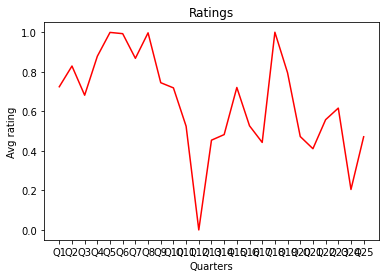

In [14]:
import matplotlib.pyplot as plt

plt.plot(quarts, norm_ratings, color = 'red')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Avg rating')


# plt.show()

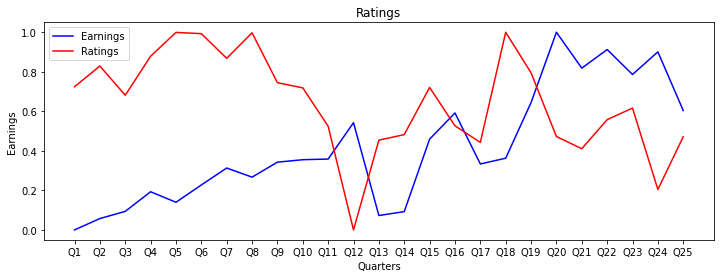

In [15]:
earnings = [
7.465,
10.28,
9.194,
10.39,
9.497,
11.22,
7.846,
5.178,
4.902,
7.349,
6.091,
2.616,
2.429,
6.882,
5.137,
5.106,
4.988,
4.269,
4.707,
3.894,
3.064,
3.569,
2.627,
2.283,
1.738
]

earnings = earnings[::-1]
# for i in range(2):
# 	earnings.insert(0, 0)

fig = plt.figure()
a = plt.plot(normalize_list(earnings), color = 'blue', label = 'Earnings')
plt.plot(quarts, norm_ratings, color = 'red', label	= 'Ratings')
plt.title('Ratings')
plt.xlabel('Quarters')
plt.ylabel('Earnings')
plt.legend(	loc = 'upper left')
fig.set_figwidth(12)

plt.show()

In [16]:
final = pd.DataFrame(
    {'quarters': quarts,
     'ratings': norm_ratings,
     'earnings': normalize_list(earnings)
    })

final.head()

,quarters,ratings,earnings
0,Q1,0.724267,0.000000
1,Q2,0.829056,0.057477
2,Q3,0.681429,0.093757
3,Q4,0.878473,0.193103
4,Q5,0.999152,0.139844


In [17]:
corr = final['ratings'].corr(final['earnings'], method = 'pearson')
corr

-0.47108961858518406



Current lag: 0


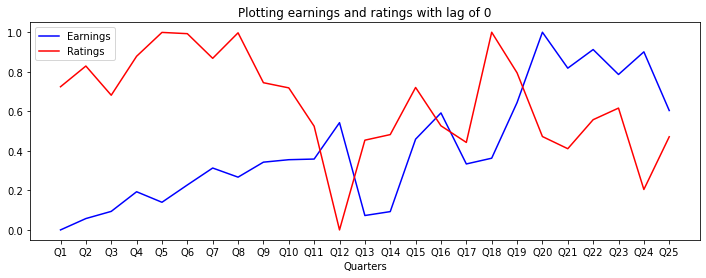

Correlation:  -0.47108961858518406


Current lag: 1


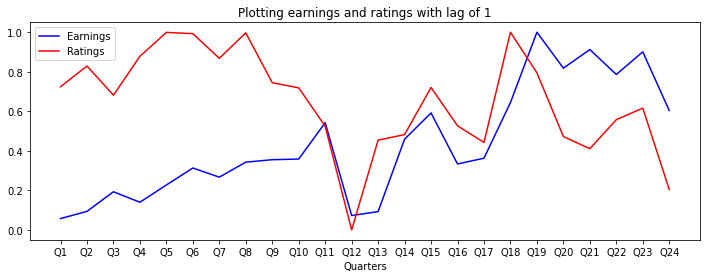

Correlation:  -0.10958942649831599


Current lag: 2


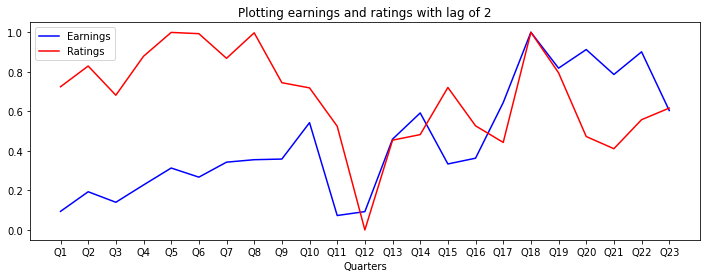

Correlation:  -0.033347353475887104


Current lag: 3


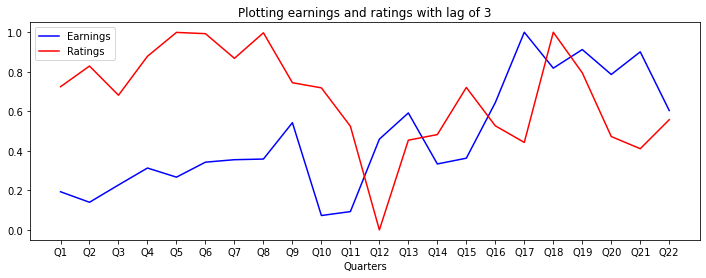

Correlation:  -0.26834660780028213


Current lag: 4


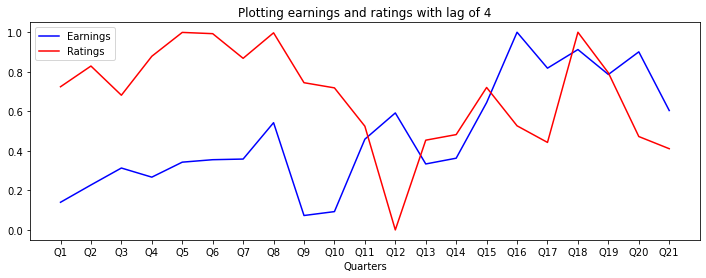

Correlation:  -0.23928866393826398


In [18]:
for lag in range(0, 5):
	print('\n\nCurrent lag:', lag)
	fig = plt.figure()
	a = plt.plot(normalize_list(earnings)[lag:], color = 'blue', label = 'Earnings')
	if lag == 0:
		q = quarts
		r = norm_ratings
	else:	
		q = quarts[:-lag]
		r = norm_ratings[:-lag]
	plt.plot(q, r, color = 'red', label	= 'Ratings')
	plt.title('Plotting earnings and ratings with lag of ' + str(lag))
	plt.xlabel('Quarters')
	plt.ylabel('')
	plt.legend(	loc = 'upper left')
	fig.set_figwidth(12)
	plt.show()

	final = pd.DataFrame(
    {'quarters': q,
     'ratings': r,
     'earnings': normalize_list(earnings)[lag:]
    })
	corr = final['ratings'].corr(final['earnings'],method = 'pearson')
	print('Correlation: ', corr)